In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os


In [2]:
dataset_path = "rockpaperscissors/rps-cv-images"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(150, 150),
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(150, 150),
    batch_size=32
)

class_names = train_ds.class_names
print("Kelas:", class_names)


Found 2188 files belonging to 3 classes.
Using 1751 files for training.
Found 2188 files belonging to 3 classes.
Using 437 files for validation.
Kelas: ['paper', 'rock', 'scissors']


In [3]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3)  # karena 3 kelas: rock, paper, scissors
])


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 20s 257ms/step - accuracy: 0.5203 - loss: 1.0478 - val_accuracy: 0.9245 - val_loss: 0.2517
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 236ms/step - accuracy: 0.9317 - loss: 0.1794 - val_accuracy: 0.9497 - val_loss: 0.1623
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 18s 332ms/step - accuracy: 0.9667 - loss: 0.0932 - val_accuracy: 0.9748 - val_loss: 0.1123
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 343ms/step - accuracy: 0.9905 - loss: 0.0432 - val_accuracy: 0.9657 - val_loss: 0.1157
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 21s 380ms/step - accuracy: 0.9930 - loss: 0.0249 - val_accuracy: 0.9657 - val_loss: 0.1382
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 22s 396ms/step - accuracy: 0.9946 - loss: 0.0152 - val_accuracy: 0.9519 - val_loss: 0.1705
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 27s 493ms/step - accuracy: 0.9893 - loss: 0.0309 - val_accuracy: 0.9497 - val_loss: 0.1595
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 31s 566ms/step - accuracy: 0.9838 - loss: 0.0506 - val_accu

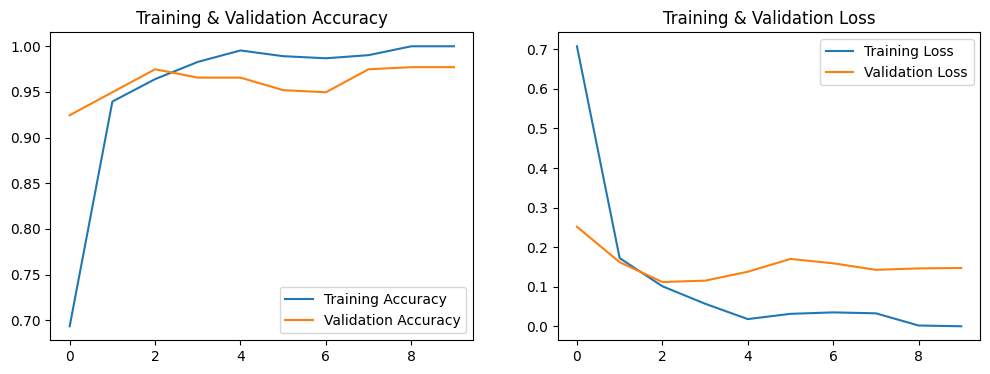

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.show()


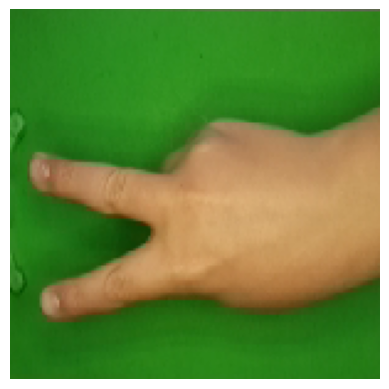

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Prediksi gambar: rock


In [13]:
img_path = input("Masukkan path gambar (misal: rockpaperscissors/test_rock.png): ")

img = image.load_img(img_path, target_size=(150,150))
plt.imshow(img)
plt.axis('off')
plt.show()

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # normalisasi

pred = model.predict(img_array)
predicted_class = class_names[np.argmax(pred[0])]

print(f"Prediksi gambar: {predicted_class}")